In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv("./Train.csv")

In [3]:
test_df = pd.read_csv("./Test.csv")

In [4]:
train_df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [5]:
cols = ["Gender","Ever_Married", "Age", "Graduated", "Profession", "Work_Experience", "Spending_Score","Family_Size"]
dummy_cols = ["Gender", "Ever_Married", "Graduated", "Profession", "Spending_Score"]

In [6]:
train_df = train_df[cols]
train_df = pd.get_dummies(train_df, columns=dummy_cols, drop_first=True)
train_df.fillna(0, inplace=True)

test_df = test_df[cols]
test_df = pd.get_dummies(test_df, columns=dummy_cols, drop_first=True)
test_df.fillna(0, inplace=True)

In [7]:
train_df.fillna(0, inplace=True)

In [8]:
train_df.head()

,Age,Work_Experience,Family_Size,Gender_Male,Ever_Married_Yes,Graduated_Yes,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Spending_Score_High,Spending_Score_Low
0,22,1.0,4.0,1,0,0,0,0,0,0,1,0,0,0,0,1
1,38,0.0,3.0,0,1,1,0,1,0,0,0,0,0,0,0,0
2,67,1.0,1.0,0,1,1,0,1,0,0,0,0,0,0,0,1
3,67,0.0,2.0,1,1,1,0,0,0,0,0,0,1,0,1,0
4,40,0.0,6.0,0,1,1,0,0,1,0,0,0,0,0,1,0


In [9]:
# Create the K means model for different values of K
def try_different_clusters(K, data):
       
    cluster_values = list(range(1, K+1))
    inertias=[]
    
    for c in cluster_values:
        model = KMeans(n_clusters = c,max_iter=400,random_state=42)
        model.fit(data)
        inertias.append(model.inertia_)
    
    return inertias

In [10]:
# Find output for k values between 1 to 12 
outputs = try_different_clusters(12, train_df)
distances = pd.DataFrame({"clusters": list(range(1, 13)),"sum of squared distances": outputs})

In [11]:
distances

,clusters,sum of squared distances
0,1,2.376602e+06
1,2,8.329887e+05
2,3,4.518711e+05
3,4,3.030498e+05
4,5,2.387345e+05
5,6,2.000020e+05
6,7,1.705326e+05
7,8,1.444770e+05
8,9,1.222099e+05
9,10,1.131327e+05


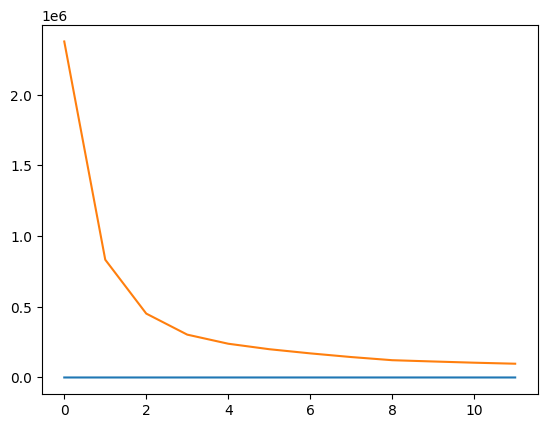

In [12]:
plt.plot(distances)

Elbow appears to be at k=2

In [13]:
num_clusters = 2

In [14]:
model = KMeans(n_clusters=num_clusters)

In [15]:
model.fit(train_df)

KMeans(n_clusters=2)

In [16]:
train_df

,Age,Work_Experience,Family_Size,Gender_Male,Ever_Married_Yes,Graduated_Yes,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Spending_Score_High,Spending_Score_Low
0,22,1.0,4.0,1,0,0,0,0,0,0,1,0,0,0,0,1
1,38,0.0,3.0,0,1,1,0,1,0,0,0,0,0,0,0,0
2,67,1.0,1.0,0,1,1,0,1,0,0,0,0,0,0,0,1
3,67,0.0,2.0,1,1,1,0,0,0,0,0,0,1,0,1,0
4,40,0.0,6.0,0,1,1,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,22,0.0,7.0,1,0,0,0,0,0,0,0,0,0,0,0,1
8064,35,3.0,4.0,1,0,0,0,0,0,1,0,0,0,0,0,1
8065,33,1.0,1.0,0,0,1,0,0,0,0,1,0,0,0,0,1
8066,27,1.0,4.0,0,0,1,0,0,0,0,1,0,0,0,0,1


In [17]:
clusters = model.predict(test_df)

In [18]:
test_df["cluster"] = clusters

In [19]:
test_df.head()

,Age,Work_Experience,Family_Size,Gender_Male,Ever_Married_Yes,Graduated_Yes,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Spending_Score_High,Spending_Score_Low,cluster
0,36,0.0,1.0,0,1,1,0,1,0,0,0,0,0,0,0,1,1
1,37,8.0,4.0,1,1,1,0,0,0,0,1,0,0,0,0,0,1
2,69,0.0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,59,11.0,2.0,1,1,0,0,0,0,1,0,0,0,0,1,0,0
4,19,0.0,4.0,0,0,0,0,0,0,0,0,0,0,1,0,1,1


In [26]:
import seaborn as sns

In [32]:
means_df = test_df.groupby("cluster").mean()

In [33]:
means_df

,Age,Work_Experience,Family_Size,Gender_Male,Ever_Married_Yes,Graduated_Yes,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Spending_Score_High,Spending_Score_Low
cluster,,,,,,,,,,,,,,,,
0,62.484425,1.448980,2.402793,0.558539,0.891515,0.700322,0.061224,0.070892,0.095596,0.099893,0.008593,0.019334,0.232009,0.031149,0.293233,0.387755
1,33.310731,2.753538,2.869104,0.533019,0.406840,0.560142,0.109080,0.100236,0.125000,0.048939,0.241745,0.037736,0.002948,0.048349,0.066627,0.739976


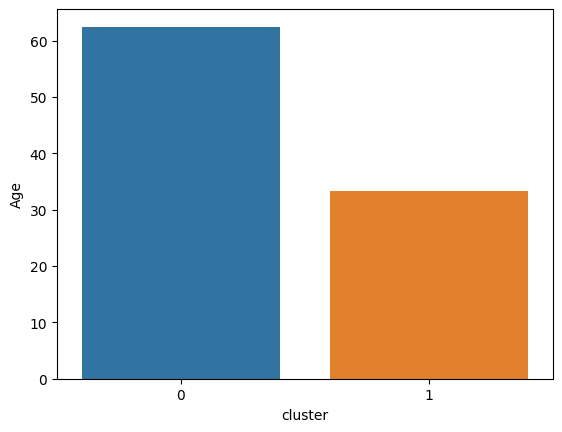

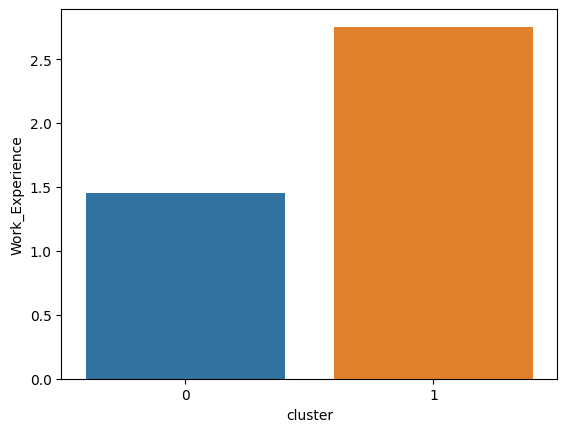

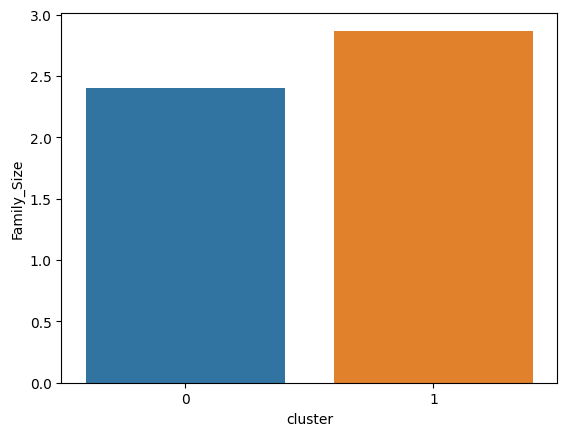

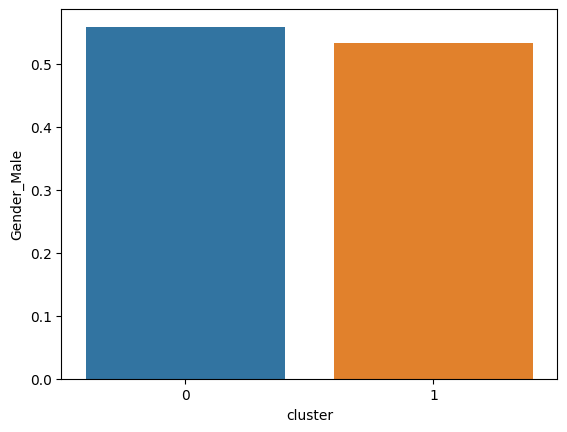

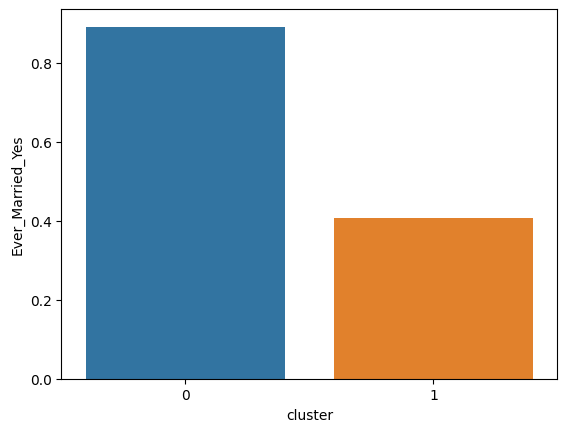

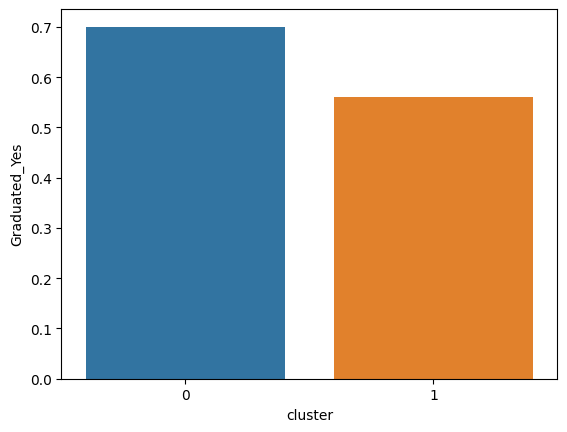

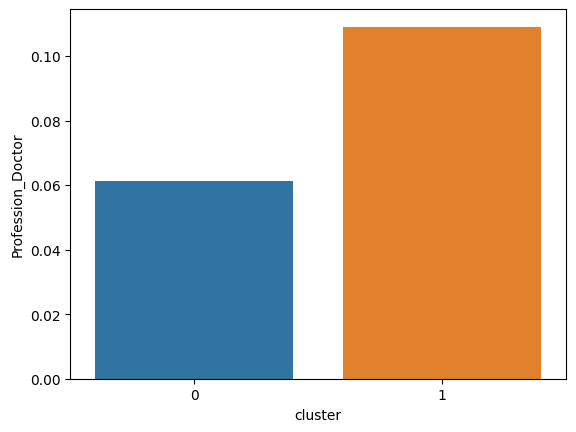

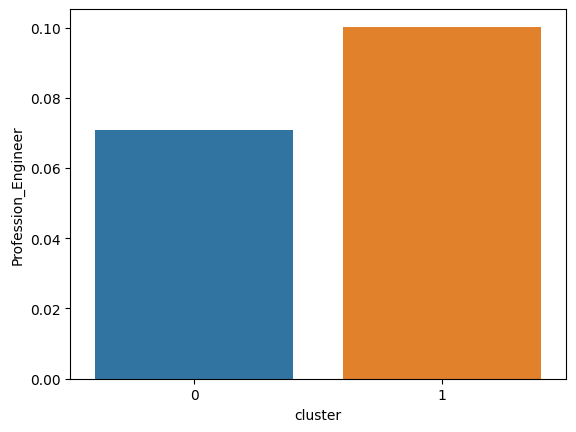

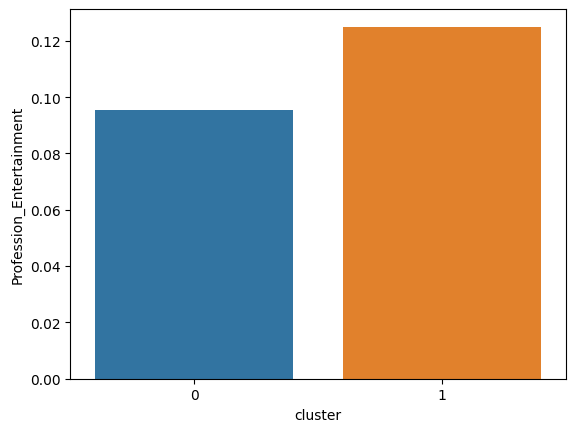

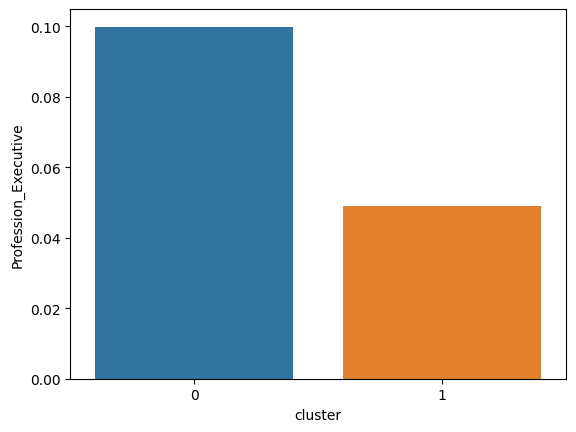

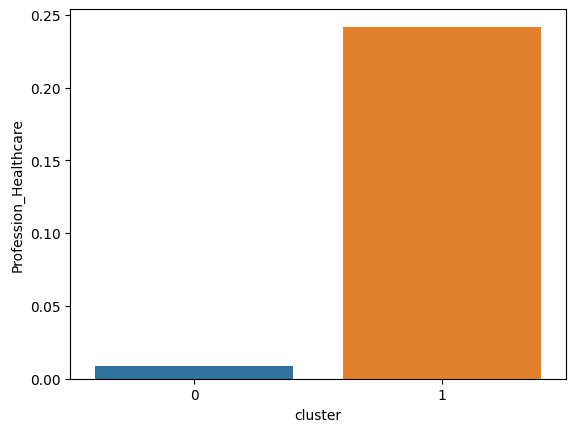

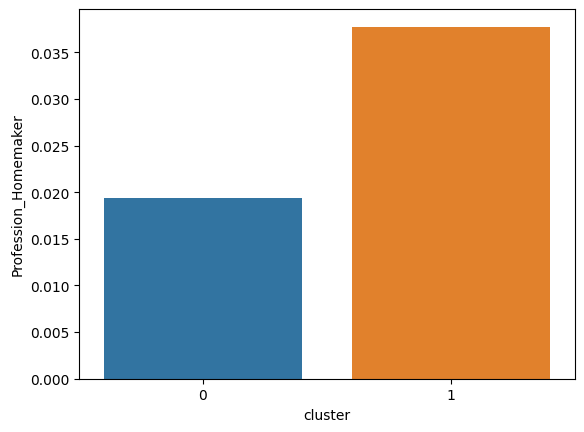

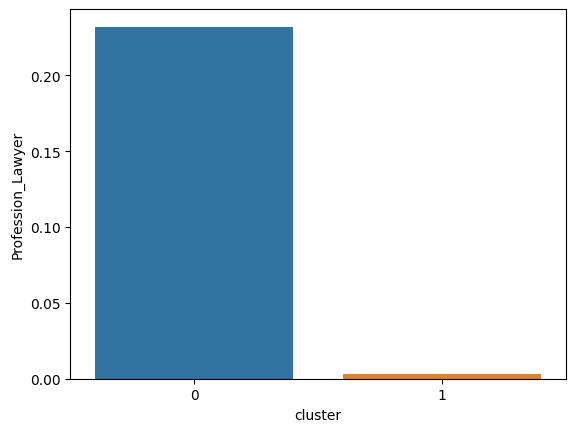

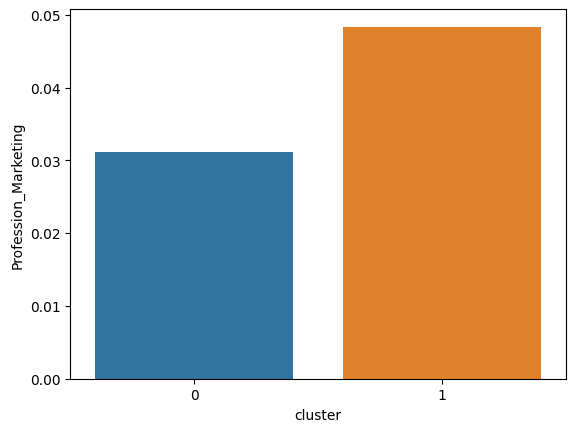

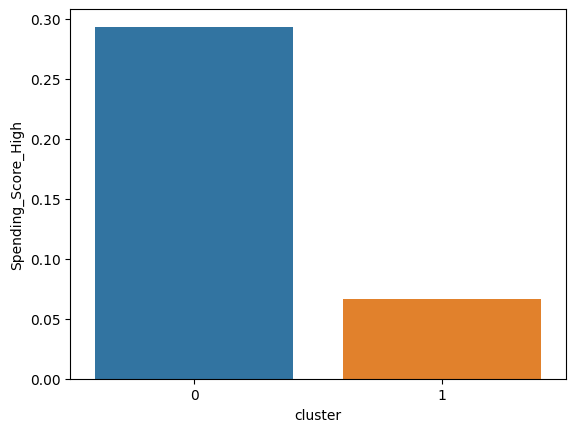

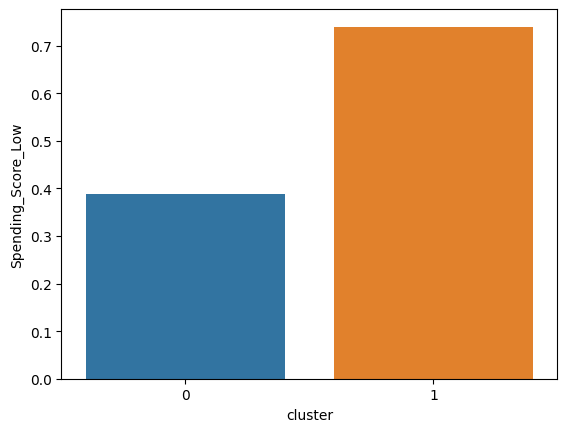

In [35]:
for col in means_df.columns:
    sns.barplot(x=means_df.index,y=col,data=means_df)
    plt.show()